Pyloric Rhythm Similarity Criteria:
1. All three neurons oscillate
2. In every cycle (AB/PD start to next AD/PD start), LP begins before PY starts and ends before PY ends, AB/PD finishes before LP starts
3. Duty cycles (relative length of each burst to the total length of the cycle) are similar to experimental averages(Prinz et al., 2004)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import math
from CTRNNclass import *
from pyloricfitness import *
from SampleGenerators import *
from HPCTRNNevolution import *

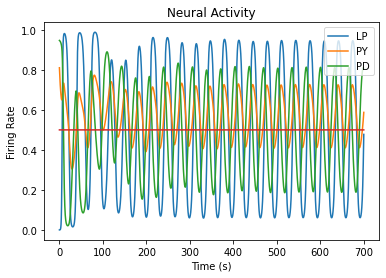

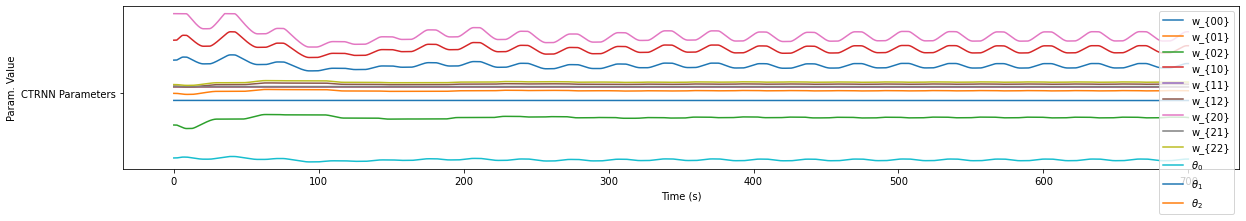

In [2]:
# test adaptive CTRNN class
weights = np.array([[6.60946,1.14559,-6.51152],[10.6385,1.19458,1.34445],[16,1.26722,1.663]])
biases = np.array([-13.1741,-1.54257,-0.114027])
timeconstants = np.array([9.42607,2.41159,7.85833])
neurongenome = np.concatenate((weights,biases,timeconstants),axis=None)
HPgenome = np.array([.25,.25,.25,.75,.75,.75,40,20,200])
duration = 700
dt = .01
C2 = CTRNN(3,dt,duration,HPgenome,neurongenome)
initial_states = np.array([3.,3.,3.])  #initial states of the neurons
C2.initializeState(initial_states)
C2.resetStepcount()
HPon = 1
for i in range(int(duration/dt)):
    C2.ctrnnstep(HPon)
    
C2.plot()
C2.plotparams()

In [10]:
#generate random circuits (standard ranges for parameters with no HP) and test them to see how many are pyloric-like
n = 100 #number of random CTRNNs to generate
duration = 1000 #in seconds
initial_states = np.array([3.,3.,3.])  #initial states of the neurons
transient = 7000 #in timesteps

success_count = 0
for i in range(n):
    if i%500 == 0:
        print("n=",i) #show progress through sample
    weights = np.random.uniform(-16,16,9)
    biases = np.random.uniform(-16,16,3)
    time_consts = np.random.uniform(.5,10,3)
    genome = np.concatenate((weights,biases,time_consts),axis=None)
    fitness = pyloriclike(genome)
    if fitness>=.3:
        success_count += 1
        print("weights", weights, "biases", biases, "time constants", time_consts, "fitness", fitness)
print(success_count)

n= 0


KeyboardInterrupt: 

Pyloric fitness 0.0


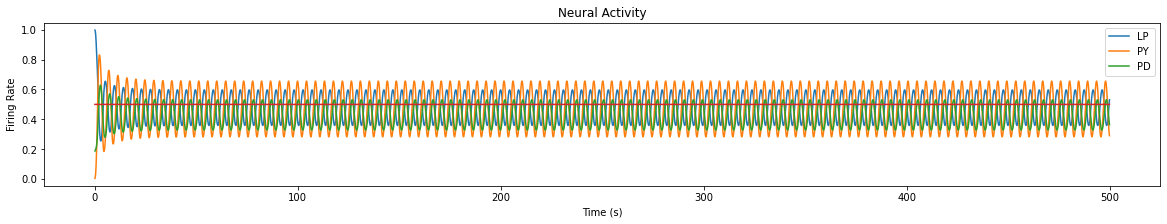

New Pyloric fitness 0.0


In [14]:
HP = 0 

#test any CTRNN for pyloric fitness and plot
# weights = np.array([[13.47792516,  10.59233265, -15.04646692],[-15.97458819,   5.7376846,   -5.37480922],[-2.20731148, -11.07581759,  -3.1880527]])
# biases = np.array([-0.39843736, -6.68032731,  2.26812979])
# timeconstants = 1/np.array([0.14892103, 0.12300845, 0.25616658])

weights = np.array([[-3.7789188,7.93029945,  1.36994916],[ -2.03197829,  9.41483729,  4.63459765],[ -6.44862027, -4.45381504, -1.80992267]])
biases = np.array([ 5.43154491 ,-6.44566085, -2.35101064])
timeconstants = 1/np.array([1.66586038 , 1.202376  ,  1.17894711])


#doubly periodic, how should I deal with them?
# weights = [[ 15.13420671 , 11.55247725, -12.01615767], [ -5.12504622, -16.72510022
#  , 15.59766673],[  15.21115945,   1.58408748 ,  1.22617987 ]] 
# biases = [-9.82697962,  -0.60614873  ,-1.96484597]   
# timeconstants = [1.13091869 ,  4.00518322  , 3.57617411]

neurongenome = np.concatenate((weights,biases,timeconstants),axis=None)
HPoffgenome = np.ones(2*3+3)
HPoffgenome[0:3] = 0
print('Pyloric fitness',pyloriclike(neurongenome))
C1 = CTRNN(3,.1,500,HPoffgenome,neurongenome)
for i in range(len(C1.time)):        #run the CTRNN for the allotted duration
    C1.ctrnnstep(HP)
C1.plot()

print('New Pyloric fitness', pyloricfitness(neurongenome))

Microbial Evolutionary Algorithm

ideas to improve: seed with larger CC population so its less likely that only one order of oscillator will evolve

In [15]:
recombProb = .25
mutatProb = .25
generations = 30

runs = 5

bestinds = np.zeros(runs)

for i in range(runs):
    print("RUN ",i,":")
    CTRNNpop = randomCTRNNsample(3,15,center_crossing = True)  #seeding with center crossing networks
    M = MicrobialCTRNN(pyloriclike, CTRNNpop, recombProb, mutatProb, generations)
    M.run()
    bestinds[i] = M.save('Evolution%s'%i)

RUN  0 :
generation 0
fitness: 0.2
generation 20
fitness: 0.2


KeyboardInterrupt: 

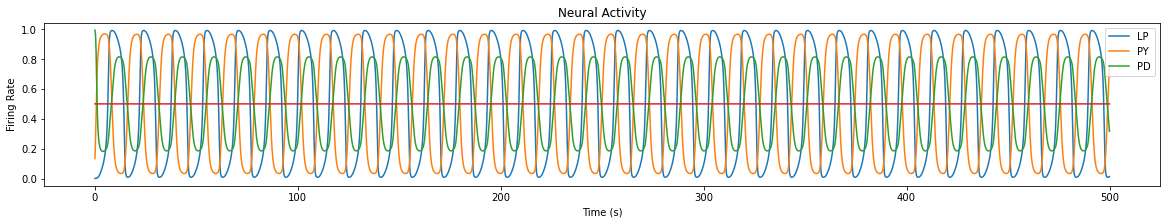

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


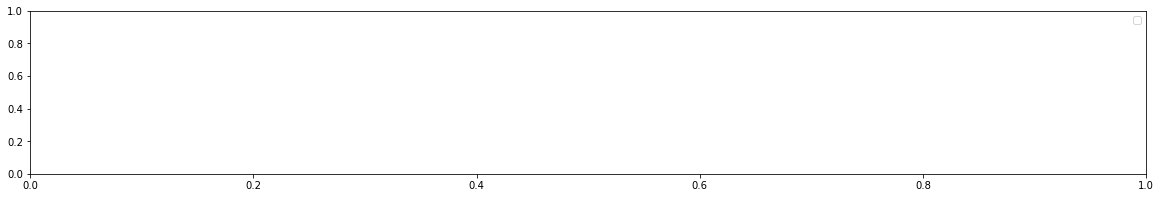

NameError: name 'bestinds' is not defined

In [5]:
CTRNNsize = 3
HP = 0 #HP on or off
HPgenome = np.ones(2*CTRNNsize+3)
HPgenome[0:CTRNNsize] = 0

runidx = 1
data = np.load('Evolution%s.npz'%runidx)
bestind = data['bestind']

C= CTRNN(3,.025,500,HPgenome,bestind)
for i in range(len(C.time)):        #run the CTRNN for the allotted duration
    C.ctrnnstep(HP)
C.plot()
#xvals = np.array([9934, 9948, 9958, 9966, 9958, 9974])-(np.ones(6)*(duration/dt)).astype(int)
#print(xvals[1])
#plt.scatter(xvals+200,(np.ones(6)*.5))
plt.legend()
plt.show()

print("Pyloric Fitness=", pyloriclike(bestinds[runidx])) #redundant to simulate twice but eh

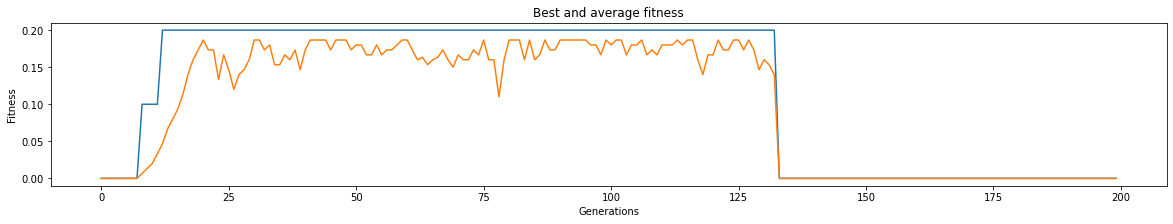

In [ ]:
for i in range(runs):
    data = np.load('Evolution%s.npz'%i)
    plt.plot(np.arange(generations),data['besthist'])
plt.title('Best Individuals Over Generations')
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

Local fitness landscape around one successful solution: sample fitness of solutions in a 15-D grid around the point 

    1. Which directions are the most "flexible"? - holding the other 14 parameters of the solution constant, which parameter has the steepest fitness dropoff? Which requires the least change before the rhythm is no longer pyloric-like at all?
    2. Visualize the local fitness landscape in several planes

In [16]:
#a = [14.82024187,  10.61253584] #original w11 and w12 of sol1
# sol1 = np.array([ 14.82024187,  10.61253584,-12.15141158,  -4.61967513,-15.81543225,  15.62745189,  14.71262429,   2.0523492 , 1.86045721, -10.25813196,  -0.29218389,  -2.47607644, 1.13091869,   4.00518322,   3.57617411])
#the original solution 1 used to make plots is apparently not quite pyloric under the fitness function anymore... don't know how it happened
# sol1 = 
sol2 = np.array([13.47792516,  10.59233265, -15.04646692,-15.97458819,   5.7376846,   -5.37480922,-2.20731148, -11.07581759,  -3.1880527,-0.39843736, -6.68032731,  2.26812979,1/0.14892103, 1/0.12300845, 1/0.25616658])
#print(pyloriclike(sol1))
print(pyloriclike(sol2))


0.5898514471885977


In [20]:
dropoffs = np.zeros((15,2))
for dim in range(15):
    newsol = np.copy(sol2)
    fitness = pyloriclike(newsol)
    while fitness > .3:
        newsol[dim] += .5
        fitness = pyloriclike(newsol)
        #print(fitness)
    dropoffs[dim,1] = newsol[dim]
    newsol = np.copy(sol2)
    fitness = pyloriclike(newsol)
    while fitness > .3:
        newsol[dim] -= .5
        fitness = pyloriclike(newsol)
        #print(fitness)
    dropoffs[dim,0] = newsol[dim]

In [19]:
dropoffssol1 = dropoffs
dropoffs[:,1]-dropoffs[:,0]
dropoffssol1

array([[ 8.47792516, 20.07792516],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [ ]:
print(widths)

[ 16  42  30   2  26  23  49  13   9  10   6   5  22   4 135]


In [ ]:
dim1lb = 6
dim1ub = 16
dim2lb = 6
dim2ub = 16
spacing = .1 #(must go evenly into both the interval widths)

#widthvals = np.array([0.8 , 2.1 , 1.5 , 0.1 , 1.3 , 1.2 , 2.45, 0.65, 0.45, 0.5 , 0.35, 0.3 , 1.15, 0.2 , 6.75])
#widths = widthvals/.01
#widths = widths.astype(int) + 1 #number of points spaced .05 apart on each dimension if the bookends are not pyloric-like

dim1 = 0 #index of par on x axis
dim2 = 1 #index par on y axis
fitnessgridsol1_2 = np.zeros((int((dim1ub-dim1lb)/spacing),int((dim2ub-dim2lb)/spacing)))#w21 vs b1
genome = np.copy(sol1)
genome[dim1] = dim1lb  #start the genome at the edge of both axes
for i in range(int((dim1ub-dim1lb)/spacing)):
    genome[dim2] = dim2lb 
    for j in range(int((dim2ub-dim2lb)/spacing)):
        fitnessgridsol1_2[i,j] = pyloriclike(genome,0)
        genome[dim2] += spacing       #and increment it with each loop
    genome[dim1] += spacing           
#print(fitnessgridsol1_1)

[ 14.2         14.         -12.15141158  -4.61967513 -15.81543225
  15.62745189  14.71262429   2.0523492    1.86045721 -10.25813196
  -0.29218389  -2.47607644   1.13091869   4.00518322   3.57617411]
possible double-periodicity
[ 14.4         14.         -12.15141158  -4.61967513 -15.81543225
  15.62745189  14.71262429   2.0523492    1.86045721 -10.25813196
  -0.29218389  -2.47607644   1.13091869   4.00518322   3.57617411]
possible double-periodicity


In [ ]:
fitnessgridsol1_2[0,0]

0.0

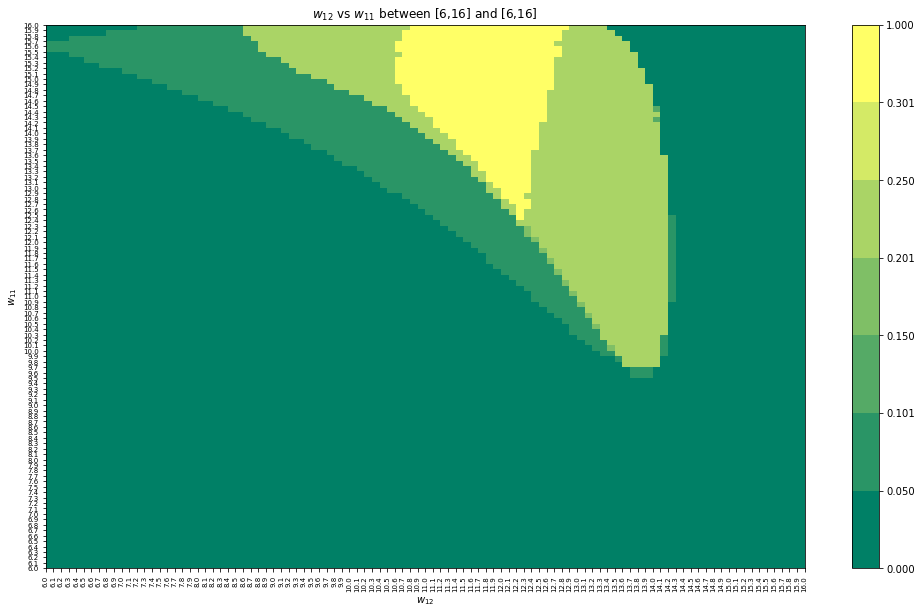

In [ ]:
cmap = cm.summer
fig, ax2 = plt.subplots(ncols=1)

#norm = colors.BoundaryNorm((0,.3,.6,.61,.62,.63,.64,.65,.66,.67,.68,.69,.7,.8,.9,1), ncolors=cmap.N, clip=True) #scaled to show extra pyloricness
norm = colors.BoundaryNorm((0,.0501,.101,.1501,.201,.2501,.301,1), ncolors=cmap.N, clip=True) #scaled to show oscillation and ordering


pc = ax2.pcolormesh(fitnessgridsol1_2, norm=norm, cmap=cmap)
fig.colorbar(pc, ax=ax2)
fig.set_figheight(10)
fig.set_figwidth(17)
ax2.set_title(r'$w_{12}$ vs $w_{11}$ between [6,16] and [6,16]')
ax2.set_ylabel(r'$w_{11}$')
ax2.set_xlabel(r'$w_{12}$')
xticks = np.arange(0,(int((dim2ub-dim2lb)/spacing))+1)
ax2.set_xticks(xticks)
xticklabels = np.round(np.arange(dim2lb,dim2ub+0.0001,spacing),3)
ax2.set_xticklabels(xticklabels,rotation = 90)
ax2.tick_params(axis='both', which='major', labelsize=7)
yticks = np.arange(0,(int((dim1ub-dim1lb)/spacing))+1)
ax2.set_yticks(yticks)
yticklabels = np.round(np.arange(dim1lb,dim1ub+0.0001,spacing),3)
ax2.set_yticklabels(yticklabels)

plt.show()

